In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(5,6)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [5]:
#importing dataset
df=pd.read_csv('E:\\cmg data\\Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
print(df.shape)#size of data frame
print(df.columns) # checking which columns are
df['Region'].value_counts()#determining total data regionvise

(9994, 11)
Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

In [7]:
#checking what  column contain
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Order ID
['OD1' 'OD2' 'OD3' ... 'OD9992' 'OD9993' 'OD9994']
--------------------------------------------------
Customer Name
['Harish' 'Sudha' 'Hussain' 'Jackson' 'Ridhesh' 'Adavan' 'Jonas' 'Hafiz'
 'Krithika' 'Ganesh' 'Yadav' 'Sharon' 'Peer' 'Sundar' 'Ramesh' 'Alan'
 'Arutra' 'Haseena' 'Verma' 'Muneer' 'Veronica' 'Shah' 'Mathew' 'Akash'
 'Anu' 'Sabeela' 'James' 'Willams' 'Malik' 'Amrish' 'Vince' 'Suresh'
 'Esther' 'Yusuf' 'Komal' 'Veena' 'Shree' 'Roshan' 'Sudeep' 'Vinne'
 'Vidya' 'Arvind' 'Kumar' 'Amy' 'Ravi' 'Sheeba' 'Ram' 'Rumaiza' 'Aditi'
 'Surya']
--------------------------------------------------
Category
['Oil & Masala' 'Beverages' 'Food Grains' 'Fruits & Veggies' 'Bakery'
 'Snacks' 'Eggs, Meat & Fish']
--------------------------------------------------
Sub Category
['Masalas' 'Health Drinks' 'Atta & Flour' 'Fresh Vegetables'
 'Organic Staples' 'Fresh Fruits' 'Biscuits' 'Cakes' 'Chocolates' 'Eggs'
 'Cookies' 'Chicken' 'Edible Oil & Ghee' 'Mutton' 'Soft Drinks'
 'Dals & Pulses' '

In [8]:
df.drop(['Order ID','State'],axis='columns', inplace=True)

In [9]:
df.info() #use to know data type and nan values(there's other way to check also)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 702.8+ KB
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
dtype: int64


In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  9994 non-null   object        
 1   Category       9994 non-null   object        
 2   Sub Category   9994 non-null   object        
 3   City           9994 non-null   object        
 4   Order Date     9994 non-null   datetime64[ns]
 5   Region         9994 non-null   object        
 6   Sales          9994 non-null   int64         
 7   Discount       9994 non-null   float64       
 8   Profit         9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 702.8+ KB


<AxesSubplot:xlabel='Profit'>

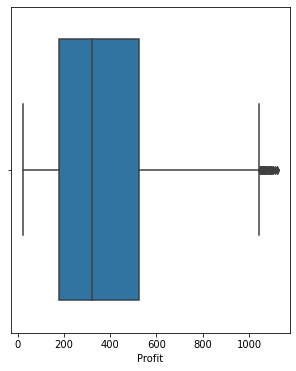

In [11]:
sns.boxplot(df['Profit'])

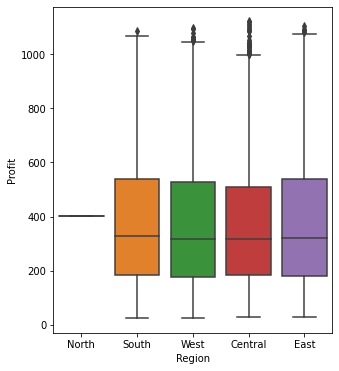

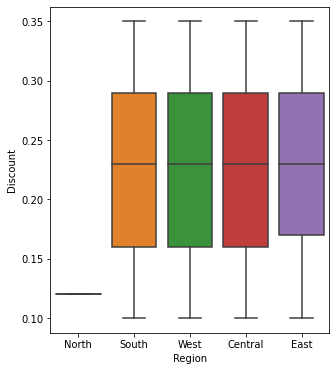

In [12]:
vars=['Profit','Discount']
for i in vars:
    plt.figure()
    sns.boxplot(data=df,x='Region',y=df[i])

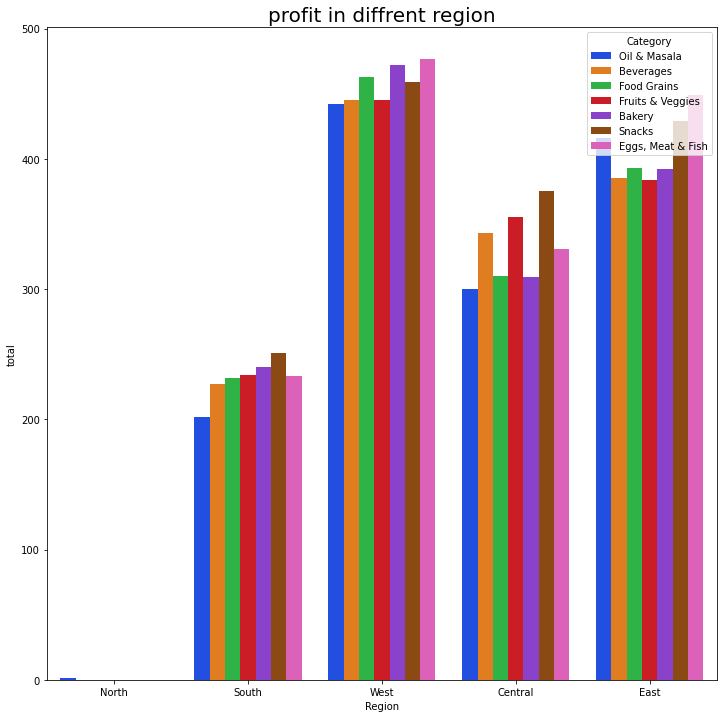

In [13]:
plt.figure(figsize=(12,12))
axl=sns.countplot(x='Region',hue='Category',data=df,palette='bright')
legend_label,_=axl.get_legend_handles_labels()
#axl.legend(bbox_to_anchor(1,1))
plt.title('profit in diffrent region',size=20)
plt.xlabel('Region')
plt.ylabel('total')
#plt.legend(['Oil & Masala','Beverages','Food Grains','Fruit&Veggies','Bakery','Snacks','Eggs','Meat & Fish'])
plt.show()

<AxesSubplot:xlabel='Profit', ylabel='Count'>

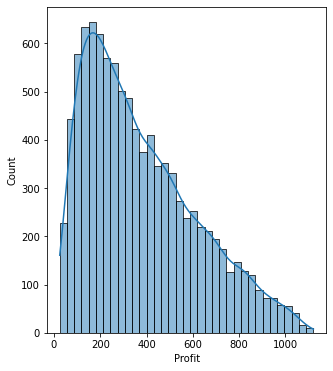

In [15]:
sns.histplot(df['Profit'],kde=True)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

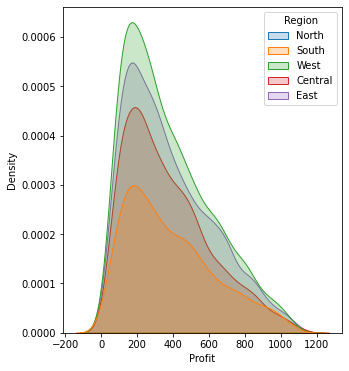

In [16]:
sns.kdeplot(df['Profit'],shade=True,hue=df['Region'])

In [ ]:
#according to above plot profit is high in western region and there's no suspisious outline, data is not normally distribute as more data lie towards right side

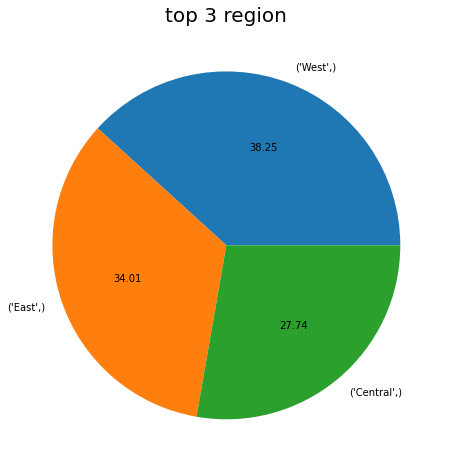

In [18]:

top_3_region=df[['Region']].value_counts()[:3]
plt.figure(figsize=(16,8))
plt.pie(top_3_region,autopct='%.2f',labels=top_3_region.index)
plt.title('top 3 region',size=20)
plt.show()


In [5]:
df=pd.read_excel('C://Users//dell//Downloads//excel dash board and power query\\Vrinda Store Data Analysis.xlsx','Vrinda Store')
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [26]:
df.loc[df['Gender'].isin(['Men','M']),'gender']='Men'
df.loc[df['Gender'].isin(['Women','W']),'gender']='Women'
df['Qty'].mask(df['Qty']=='One',1,inplace=True)
df['Qty'].mask(df['Qty']=='Two',2,inplace=True)
df.loc[df['Age']<=30,'age_group']='teenager'
df.loc[(df['Age']>30) & (df['Age']<50),'age_group']='adult'   #creating conditoon column
df.loc[df['Age']>=50,'age_group']='older'

In [27]:
df['Qty']=df['Qty'].apply(pd.to_numeric)
df['year']=pd.DatetimeIndex(df['Date']).year
df['revenue']=df['Amount']*df['Qty']

In [28]:
df['month']=df['Date'].apply(lambda x:x.strftime('%B-%Y'))


In [29]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Order ID
['171-1029312-3038738' '405-2183842-2225946' '171-1641533-8921966' ...
 '408-3572295-5992330' '405-1423498-9705162' '408-4694875-8249153']
--------------------------------------------------
Gender
['Women' 'Men' 'W' 'M']
--------------------------------------------------
Status
['Delivered' 'Refunded' 'Cancelled' 'Returned']
--------------------------------------------------
Channel 
['Myntra' 'Ajio' 'Amazon' 'Flipkart' 'Meesho' 'Others' 'Nalli']
--------------------------------------------------
SKU
['JNE1233-BLUE-KR-031-XXL' 'SET414-KR-NP-L' 'SET261-KR-PP-S' ...
 'J0090-TP-M' 'JNE3427-KR-XXL' 'J0051-KR-S']
--------------------------------------------------
Category
['kurta' 'Set' 'Western Dress' 'Top' 'Saree' 'Blouse' 'Ethnic Dress'
 'Bottom']
--------------------------------------------------
Size
['XXL' 'L' 'S' 'M' 'XL' 'XS' '3XL' 'Free' '6XL' '4XL' '5XL']
--------------------------------------------------
currency
['INR']
--------------------------------------------------

In [ ]:
sns.distplot(data=df,x=df['age'],col=df['gender'],kde=True)

In [ ]:
plt.bar(['Delivered','Refunded','Cancelled','Returned'],df[['Status']].value_counts())

<AxesSubplot:xlabel='revenue'>

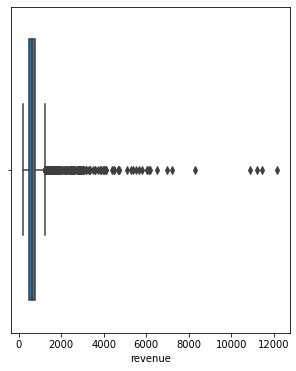

In [35]:
sns.boxplot(df['revenue'])